In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [2]:
df = pd.read_csv("flights_sample_3m.csv")

In [3]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [5]:
df = df[df['FL_DATE'] >= '2022-09-01']

In [6]:
df = df.drop(['AIRLINE_DOT', 'AIRLINE_CODE', 'ORIGIN', 'DEST'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692162 entries, 1 to 2999997
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   FL_DATE                  692162 non-null  datetime64[ns]
 1   AIRLINE                  692162 non-null  object        
 2   DOT_CODE                 692162 non-null  int64         
 3   FL_NUMBER                692162 non-null  int64         
 4   ORIGIN_CITY              692162 non-null  object        
 5   DEST_CITY                692162 non-null  object        
 6   CRS_DEP_TIME             692162 non-null  int64         
 7   DEP_TIME                 679674 non-null  float64       
 8   DEP_DELAY                679667 non-null  float64       
 9   TAXI_OUT                 679378 non-null  float64       
 10  WHEELS_OFF               679378 non-null  float64       
 11  WHEELS_ON                679116 non-null  float64       
 12  TAXI_IN             

In [8]:
airports = pd.read_csv("airports.csv")

In [9]:
from datetime import date
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

df['dia_semana'] = df['FL_DATE'].dt.day_name()

df['dia_semana_nombre'] = df['FL_DATE'].dt.day_name()

df['nombre_mes'] = df['FL_DATE'].dt.month_name()

In [10]:
df['YEAR'] = df['FL_DATE'].dt.year
df['MONTH'] = df['FL_DATE'].dt.month
df['DAY'] = df['FL_DATE'].dt.day

In [11]:
df = df.drop(['FL_DATE'], axis=1)

[Text(0.0, 0, 'Monday'),
 Text(1.0, 0, 'Tuesday'),
 Text(2.0, 0, 'Wednesday'),
 Text(3.0, 0, 'Thursday'),
 Text(4.0, 0, 'Friday'),
 Text(5.0, 0, 'Saturday'),
 Text(6.0, 0, 'Sunday')]

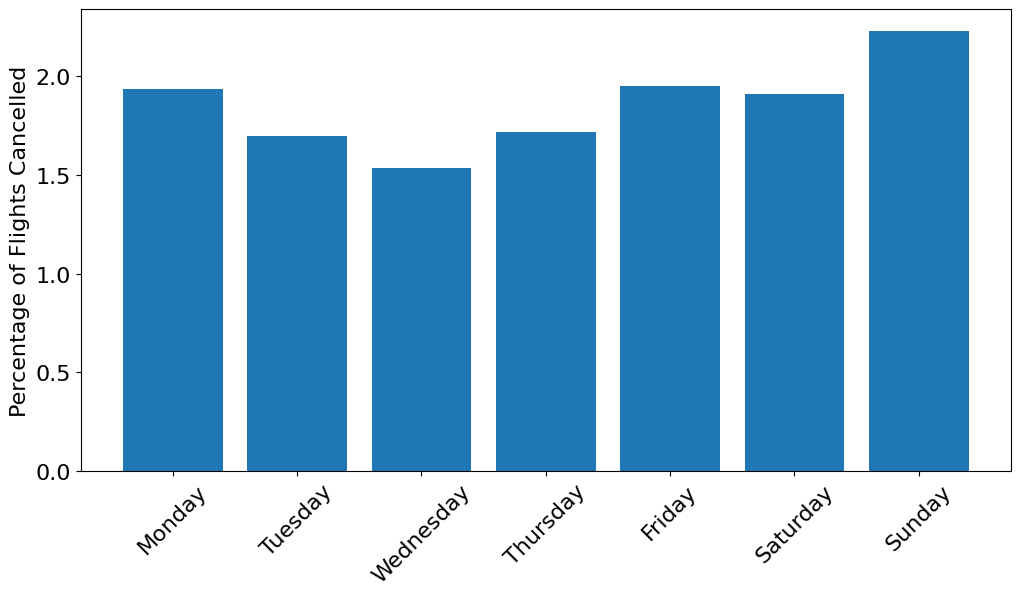

In [12]:
font = {'size'   : 16}
plt.rc('font', **font)
df['CANCELLED'] = df['CANCELLED'].round(0)
cancelled = df[df['CANCELLED']==1]
days_cancelled = cancelled['CANCELLED'].groupby(df['dia_semana_nombre']).count()
days_total = df['CANCELLED'].groupby(df['dia_semana_nombre']).count()
days_frac = np.divide(days_cancelled, days_total)

x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (12,6))

ax.set_ylabel('Percentage of Flights Cancelled')
ax.bar(x,days_frac*100, align='center')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)

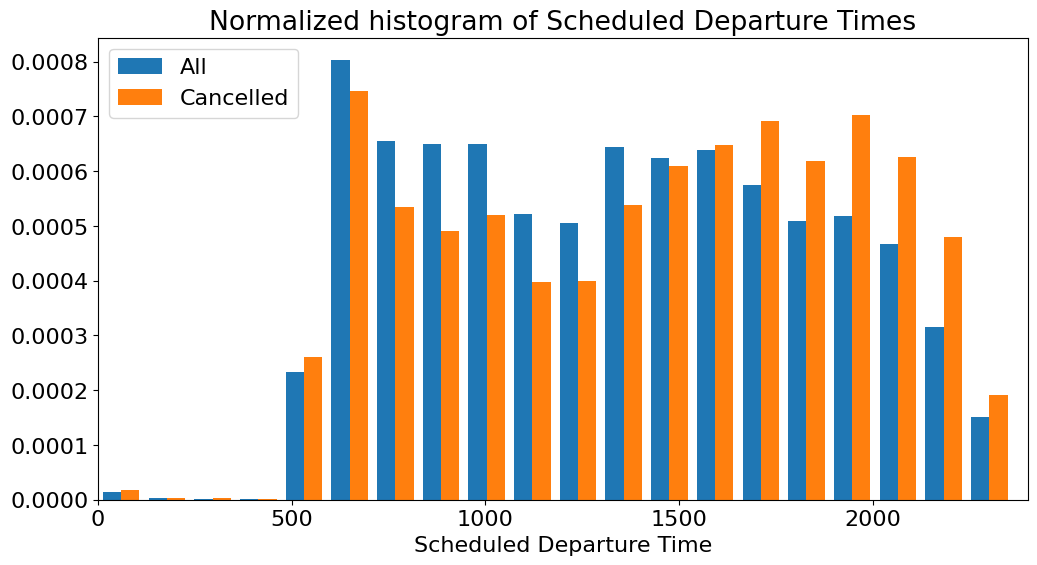

In [13]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['CRS_DEP_TIME'], cancelled['CRS_DEP_TIME']], density=True, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,2400)

ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')

plt.legend()
plt.show()

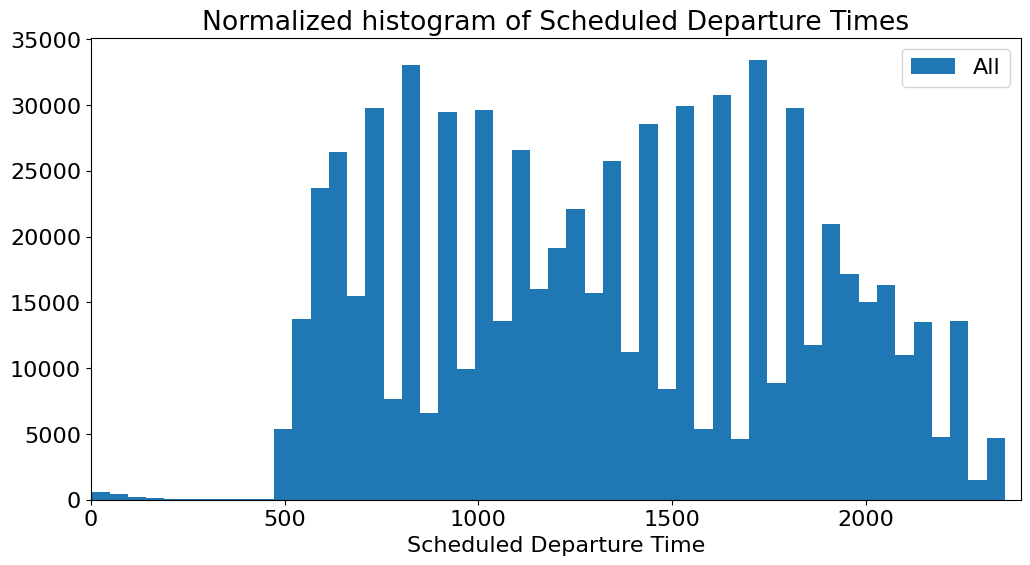

In [14]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['CRS_DEP_TIME']], bins=50, label=['All', 'Cancelled'])

ax.set_xlim(0,2400)

ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')

plt.legend()
plt.show()

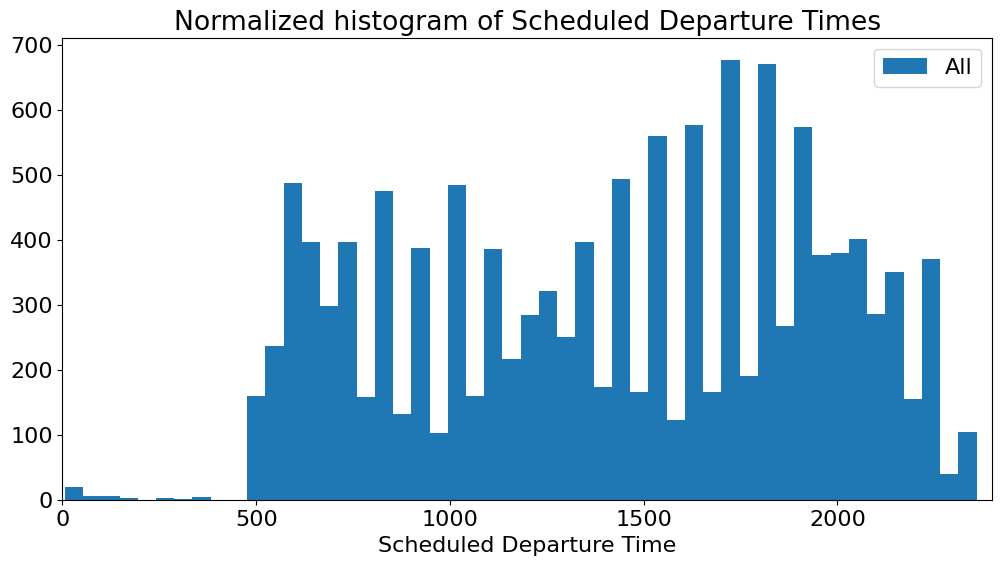

In [15]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([cancelled['CRS_DEP_TIME']], bins=50, label=['All', 'Cancelled'])

ax.set_xlim(0,2400)

ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')

plt.legend()
plt.show()

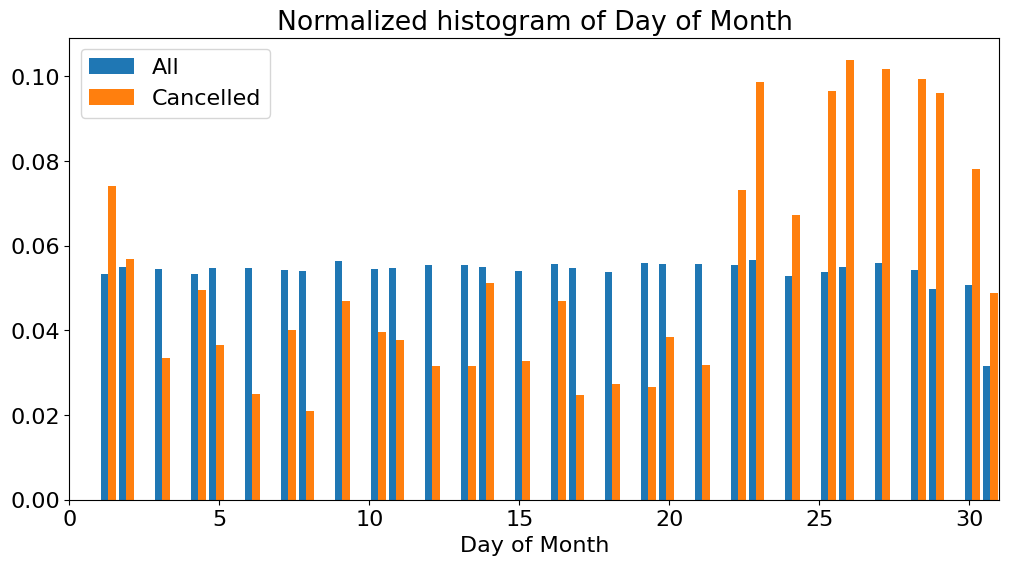

In [16]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['DAY'], cancelled['DAY']], density=True, bins=50, label=['All', 'Cancelled'])

ax.set_xlim(0,31)

ax.set_xlabel('Day of Month')
ax.set_title('Normalized histogram of Day of Month')

plt.legend()
plt.show()

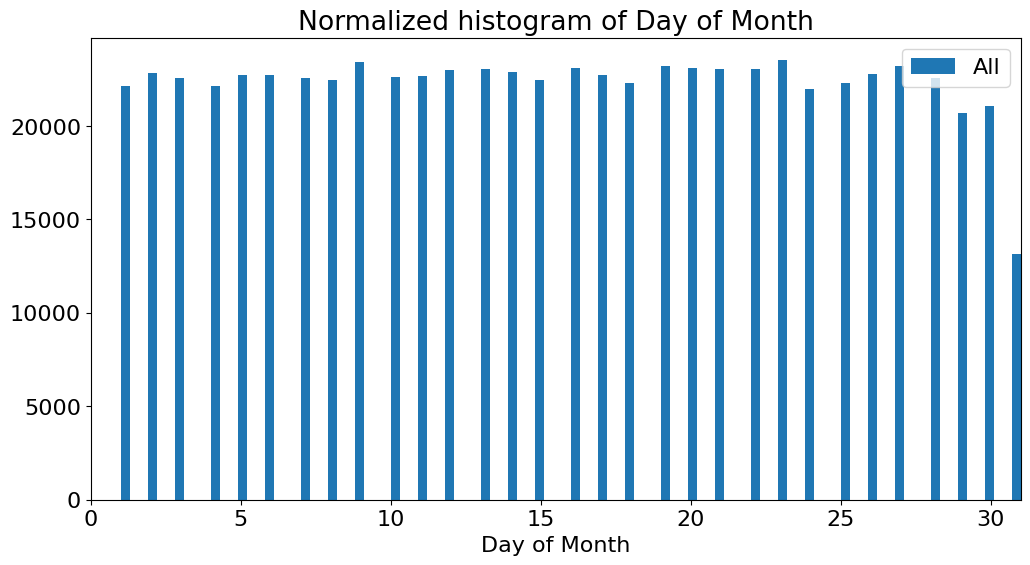

In [17]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([ df['DAY']], bins=100, label=['All', 'Cancelled'])

ax.set_xlim(0,31)

ax.set_xlabel('Day of Month')
ax.set_title('Normalized histogram of Day of Month')

plt.legend()
plt.show()

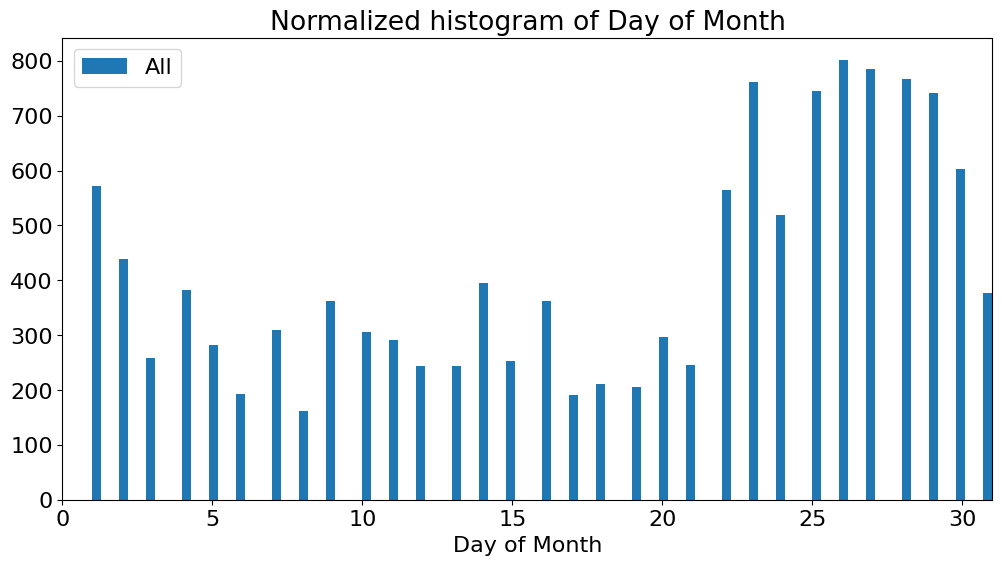

In [18]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([ cancelled['DAY']], bins=100, label=['All', 'Cancelled'])

ax.set_xlim(0,31)

ax.set_xlabel('Day of Month')
ax.set_title('Normalized histogram of Day of Month')

plt.legend()
plt.show()

In [19]:
df['nombre_mes']

1           November
3              March
6               June
8           February
22          November
             ...    
2999989          May
2999990         July
2999995     November
2999996     November
2999997    September
Name: nombre_mes, Length: 692162, dtype: object

In [20]:
cancelled['nombre_mes']

1070           July
1152       December
1246         August
1280          March
1419           June
             ...   
2998788        July
2998909        July
2999342       April
2999711    December
2999946        July
Name: nombre_mes, Length: 12865, dtype: object

C:\Users\Pilar\AppData\Local\Temp\ipykernel_9004\2019252901.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( month, rotation = 45)


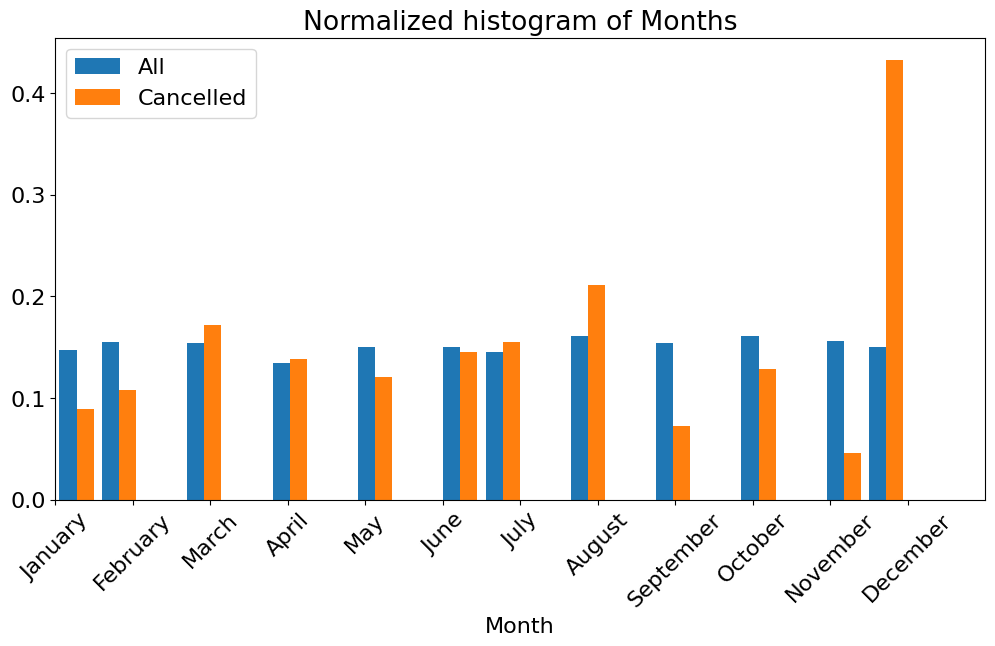

In [21]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['nombre_mes'], cancelled['nombre_mes']], density=True, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,12)
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xlabel('Month')
ax.set_title('Normalized histogram of Months')
ax.set_xticklabels( month, rotation = 45)

plt.legend()
plt.show()

C:\Users\Pilar\AppData\Local\Temp\ipykernel_9004\112643586.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( month, rotation = 45)


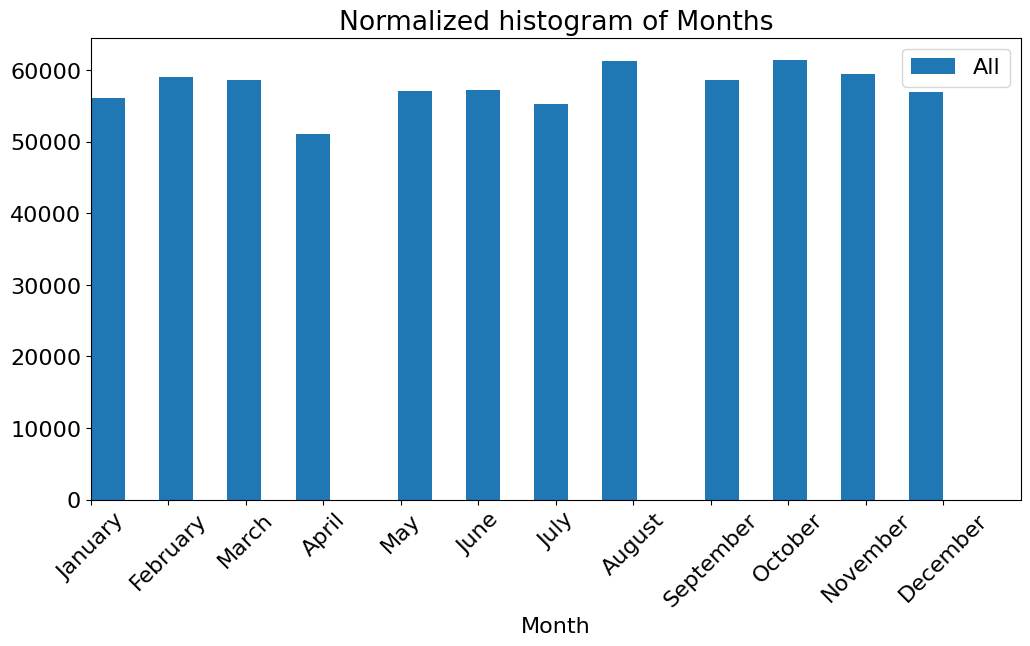

In [22]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['nombre_mes']], bins=25, label=['All'])

ax.set_xlim(0,12)
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xlabel('Month')
ax.set_title('Normalized histogram of Months')
ax.set_xticklabels( month, rotation = 45)

plt.legend()
plt.show()

C:\Users\Pilar\AppData\Local\Temp\ipykernel_9004\2997005206.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( month, rotation = 45)


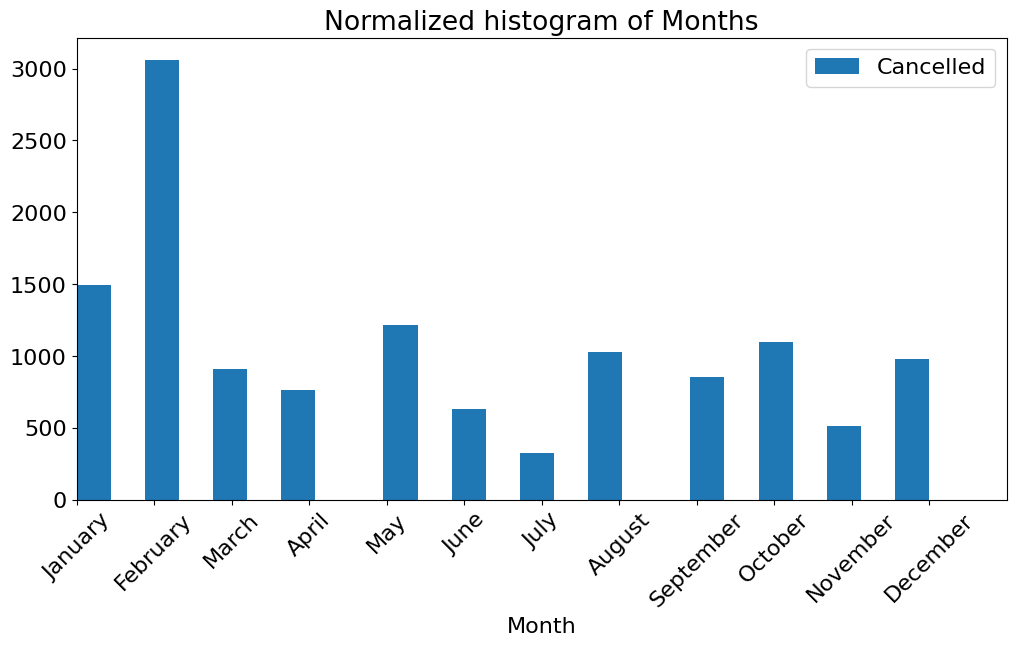

In [23]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([cancelled['nombre_mes']], bins=25, label=['Cancelled'])

ax.set_xlim(0,12)
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xlabel('Month')
ax.set_title('Normalized histogram of Months')
ax.set_xticklabels( month, rotation = 45)

plt.legend()
plt.show()

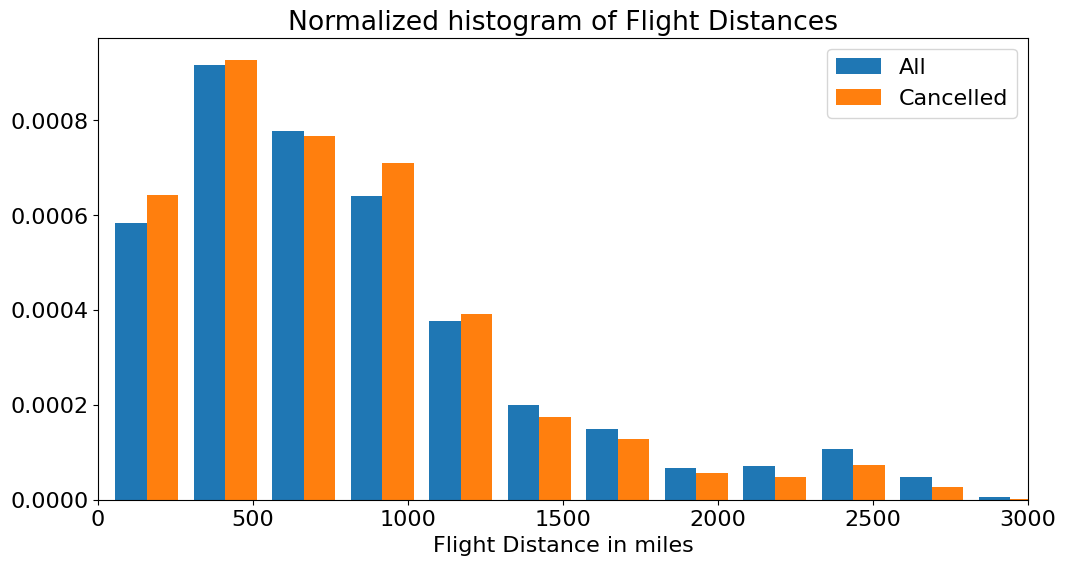

In [24]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['DISTANCE'], cancelled['DISTANCE']], density=True, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,3000)
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Normalized histogram of Flight Distances')

plt.legend()
plt.show()

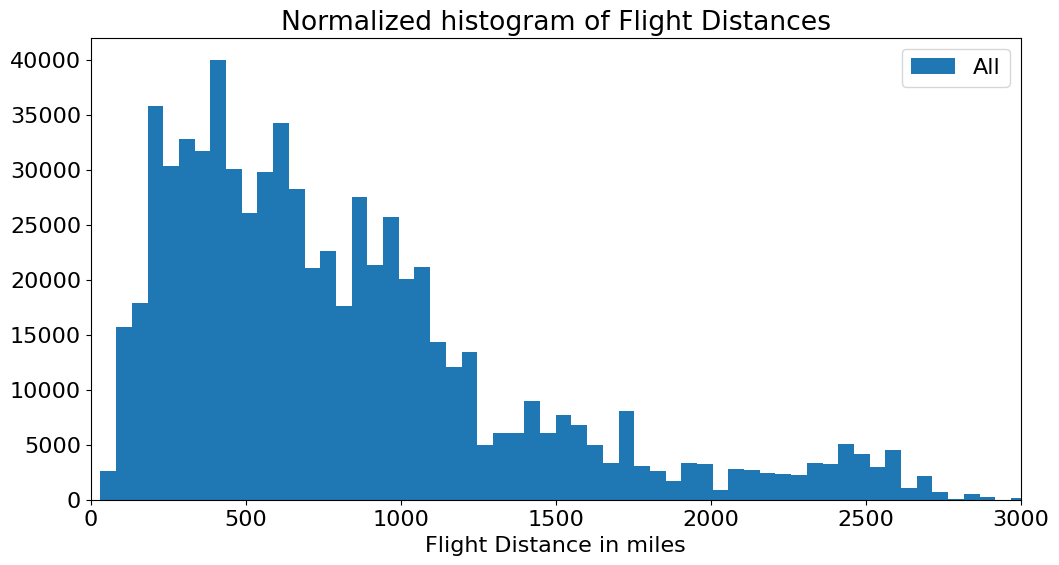

In [25]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([df['DISTANCE']], bins=100, label=['All'])

ax.set_xlim(0,3000)
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Normalized histogram of Flight Distances')

plt.legend()
plt.show()

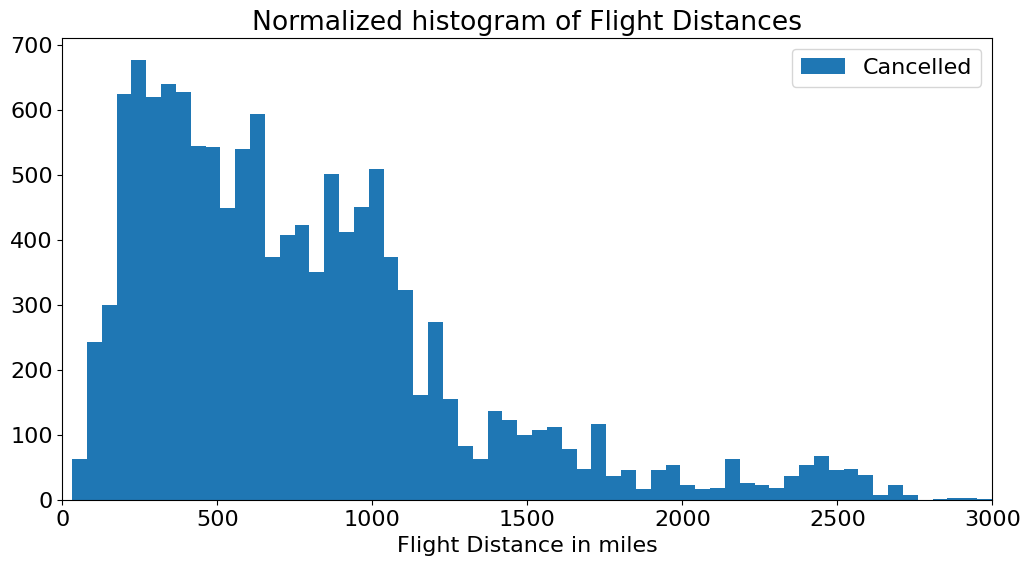

In [26]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist([cancelled['DISTANCE']], bins=100, label=[ 'Cancelled'])

ax.set_xlim(0,3000)
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Normalized histogram of Flight Distances')

plt.legend()
plt.show()

C:\Users\Pilar\AppData\Local\Temp\ipykernel_9004\1620686335.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_delay'].fillna(0, inplace=True)


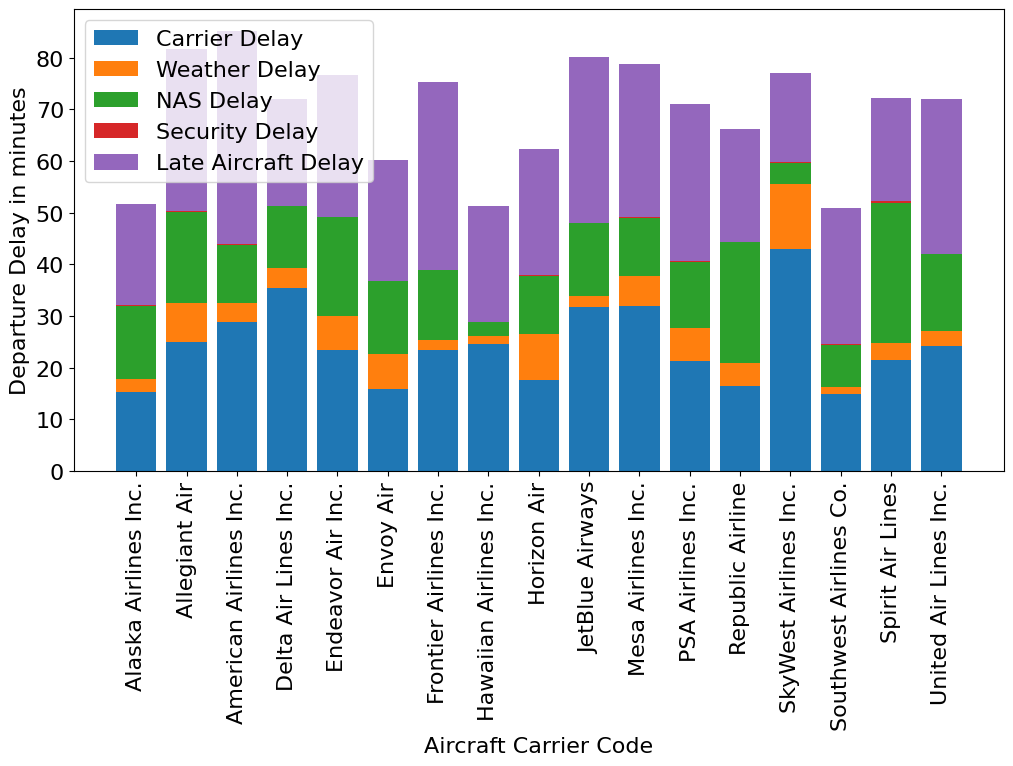

In [37]:
df['total_delay'] = (df['DELAY_DUE_CARRIER'] + df['DELAY_DUE_WEATHER']
             + df['DELAY_DUE_NAS'] + df['DELAY_DUE_SECURITY'] + df['DELAY_DUE_LATE_AIRCRAFT'])

df_delayed = df[~np.isnan(df['total_delay'])]
df['total_delay'].fillna(0, inplace=True)
df_delayed.head()

carrier_group = df_delayed['DELAY_DUE_CARRIER'].groupby(df_delayed['AIRLINE']).mean()
weather_group = df_delayed['DELAY_DUE_WEATHER'].groupby(df_delayed['AIRLINE']).mean()
nas_group = df_delayed['DELAY_DUE_NAS'].groupby(df_delayed['AIRLINE']).mean()
security_group = df_delayed['DELAY_DUE_SECURITY'].groupby(df_delayed['AIRLINE']).mean()
late_group = df_delayed['DELAY_DUE_LATE_AIRCRAFT'].groupby(df_delayed['AIRLINE']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 90)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()

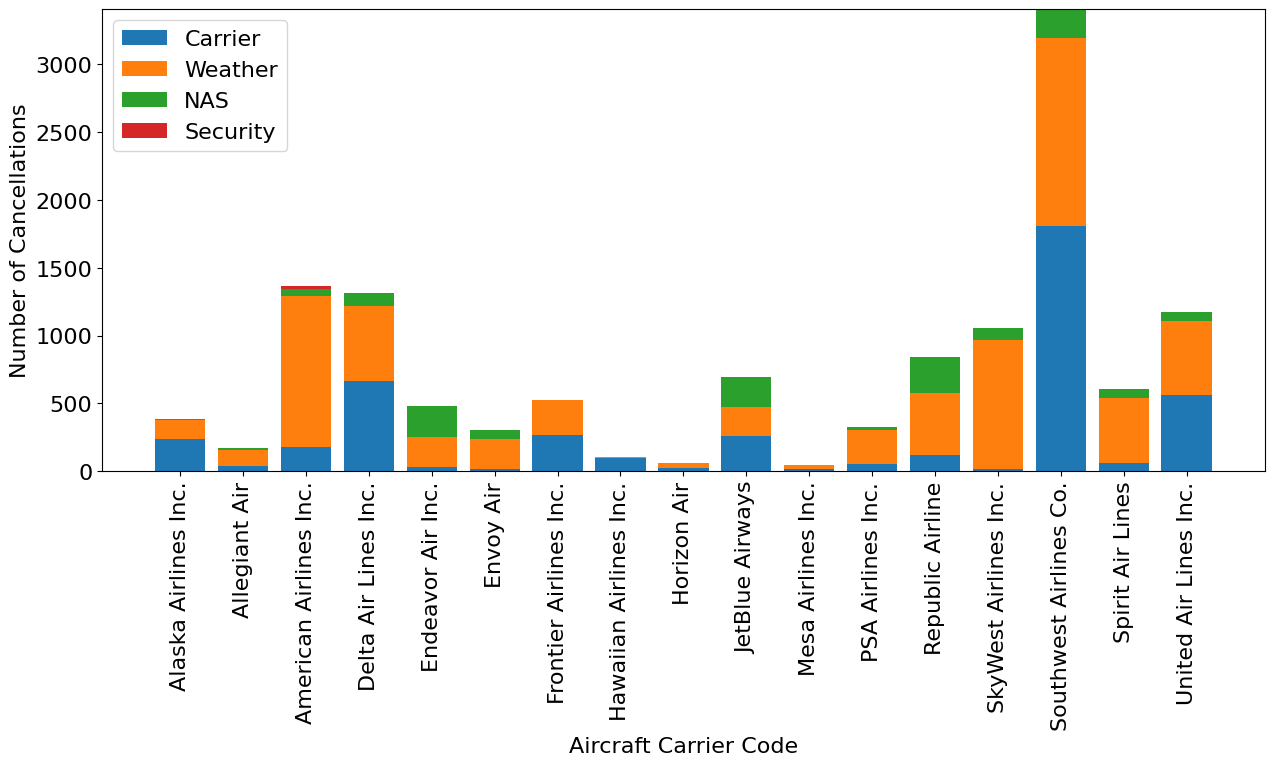

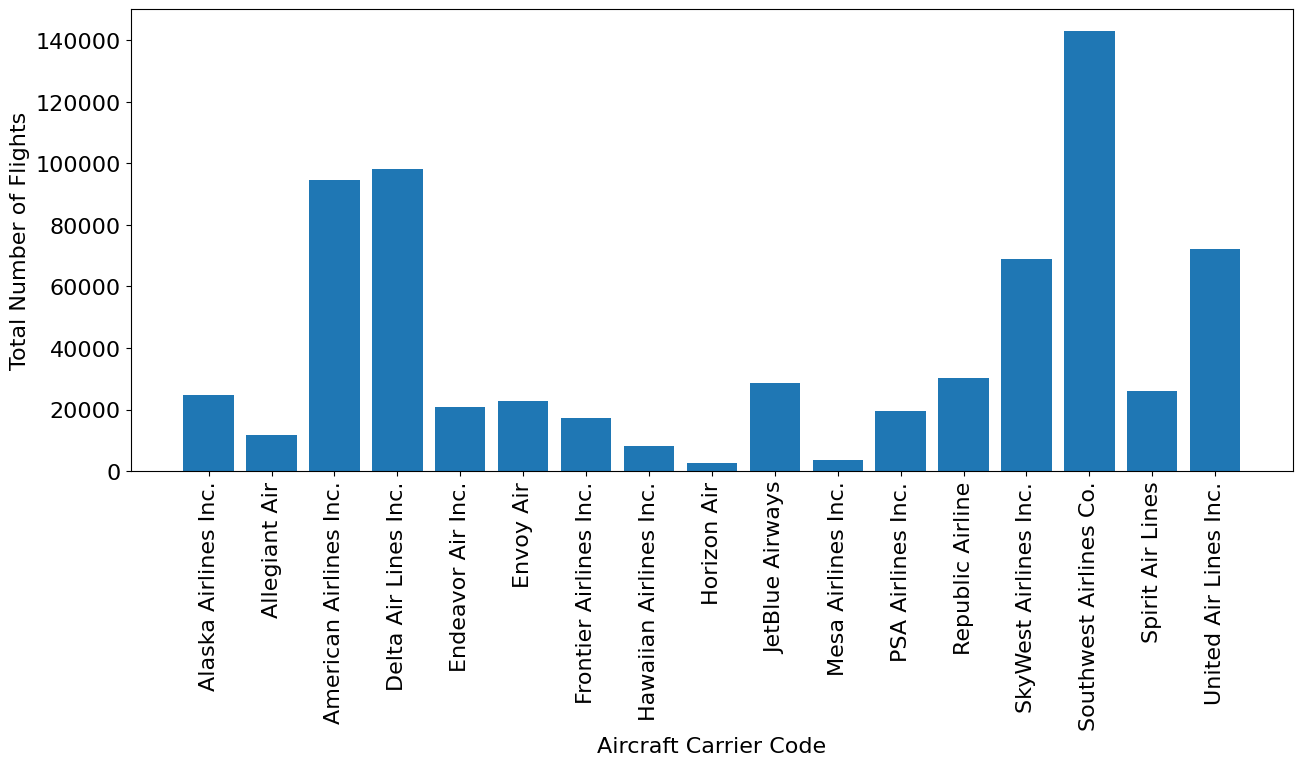

In [28]:
cancelled_group = cancelled.groupby(['AIRLINE','CANCELLATION_CODE']).size().reindex(fill_value=0.0).unstack()
cg = cancelled_group.fillna(0)

b_bottom = cg.loc[:,'A'].values
c_bottom = b_bottom + cg.loc[:,'B'].values
d_bottom = c_bottom + cg.loc[:,'C'].values

x = cg.loc[:,'A'].index.values

fig, ax = plt.subplots(figsize = (15,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 90)
ax.bar(np.arange(len(x)),cg.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cg.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cg.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
ax.bar(np.arange(len(x)),cg.loc[:,'D'].values, align='center', bottom=d_bottom, label='Security')


ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Number of Cancellations')

plt.legend()
plt.show()

total_flights_per_carrier = df['AIRLINE'].groupby(df['AIRLINE']).count()

fig, ax1 = plt.subplots(figsize = (15,6))

x = total_flights_per_carrier.index.values

ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x, rotation = 90)
ax1.bar(np.arange(len(x)),total_flights_per_carrier.values, align='center')

ax1.set_xlabel('Aircraft Carrier Code')
ax1.set_ylabel('Total Number of Flights')

plt.show()

C:\Users\Pilar\AppData\Local\Temp\ipykernel_9004\2474212677.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_delay'].fillna(0, inplace=True)


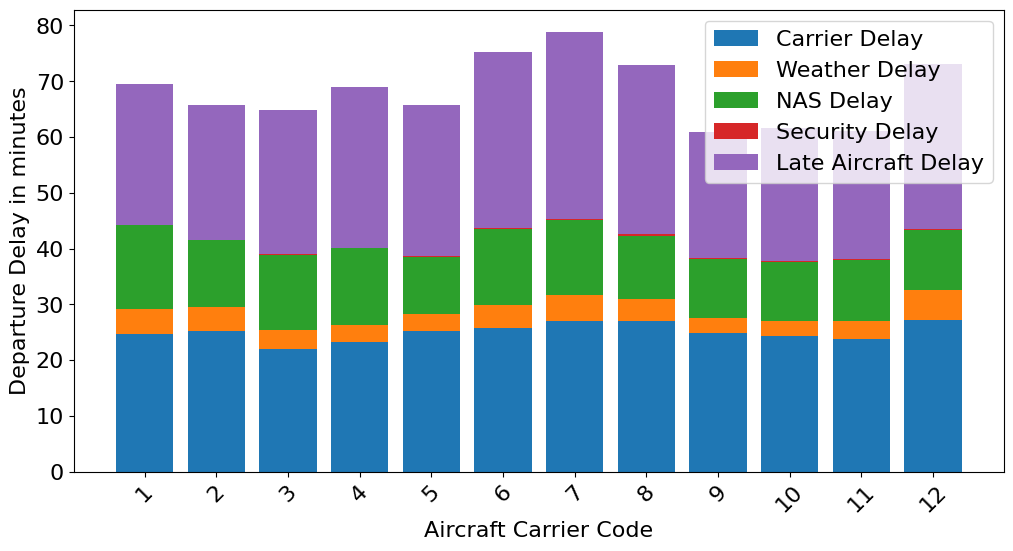

In [29]:
df['total_delay'] = (df['DELAY_DUE_CARRIER'] + df['DELAY_DUE_WEATHER']
             + df['DELAY_DUE_NAS'] + df['DELAY_DUE_SECURITY'] + df['DELAY_DUE_LATE_AIRCRAFT'])

df_delayed = df[~np.isnan(df['total_delay'])]
df['total_delay'].fillna(0, inplace=True)
df_delayed.head()

carrier_group = df_delayed['DELAY_DUE_CARRIER'].groupby(df_delayed['MONTH']).mean()
weather_group = df_delayed['DELAY_DUE_WEATHER'].groupby(df_delayed['MONTH']).mean()
nas_group = df_delayed['DELAY_DUE_NAS'].groupby(df_delayed['MONTH']).mean()
security_group = df_delayed['DELAY_DUE_SECURITY'].groupby(df_delayed['MONTH']).mean()
late_group = df_delayed['DELAY_DUE_LATE_AIRCRAFT'].groupby(df_delayed['MONTH']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()

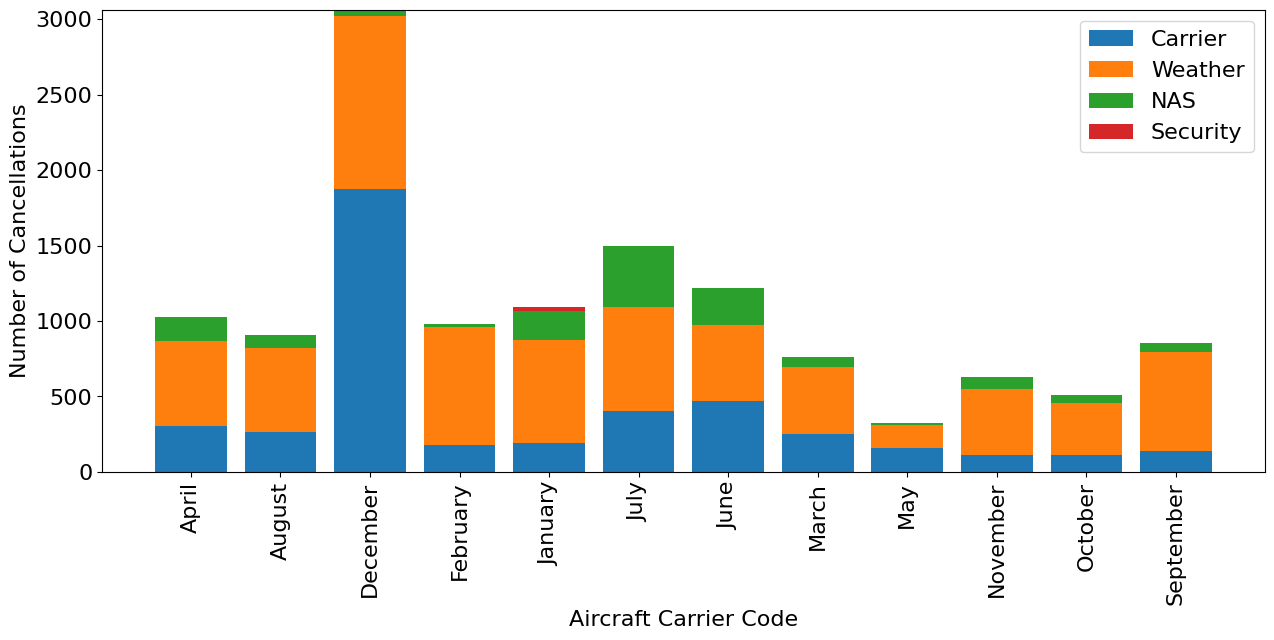

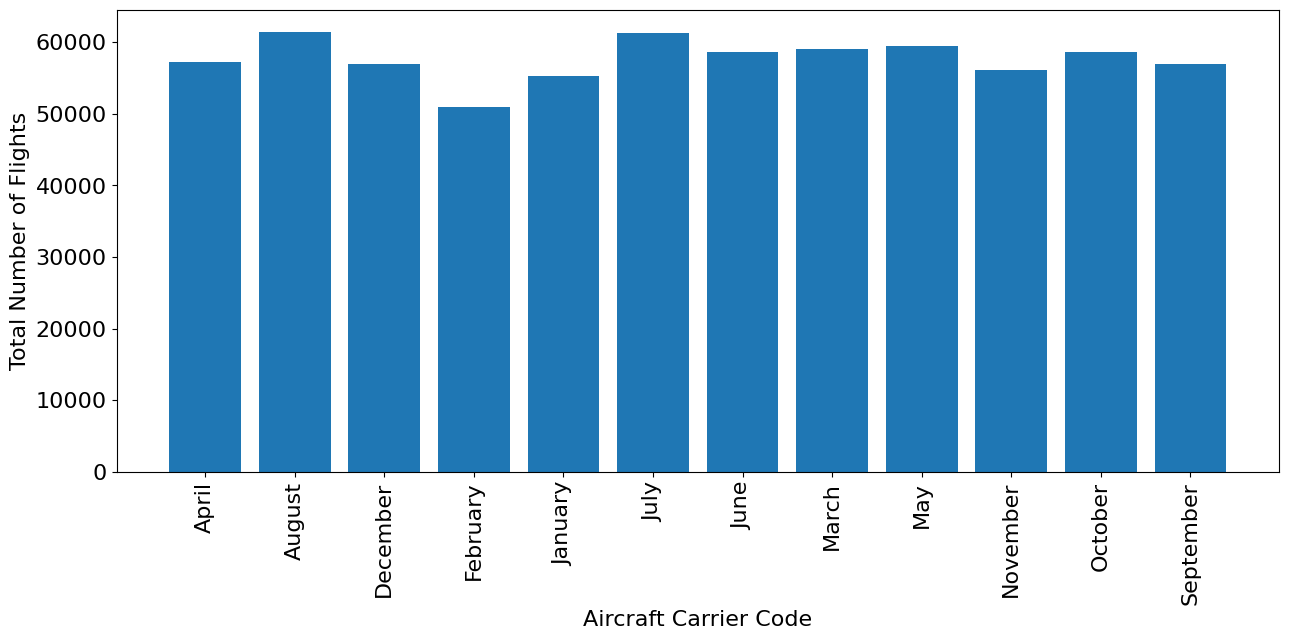

In [30]:
cancelled_group = cancelled.groupby(['nombre_mes','CANCELLATION_CODE']).size().reindex(fill_value=0.0).unstack()
cg = cancelled_group.fillna(0)

b_bottom = cg.loc[:,'A'].values
c_bottom = b_bottom + cg.loc[:,'B'].values
d_bottom = c_bottom + cg.loc[:,'C'].values

x = cg.loc[:,'A'].index.values

fig, ax = plt.subplots(figsize = (15,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 90)
ax.bar(np.arange(len(x)),cg.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cg.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cg.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
ax.bar(np.arange(len(x)),cg.loc[:,'D'].values, align='center', bottom=d_bottom, label='Security')


ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Number of Cancellations')

plt.legend()
plt.show()

total_flights_per_carrier = df['nombre_mes'].groupby(df['nombre_mes']).count()

fig, ax1 = plt.subplots(figsize = (15,6))

x = total_flights_per_carrier.index.values

ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x, rotation = 90)
ax1.bar(np.arange(len(x)),total_flights_per_carrier.values, align='center')

ax1.set_xlabel('Aircraft Carrier Code')
ax1.set_ylabel('Total Number of Flights')

plt.show()

C:\Users\Pilar\AppData\Local\Temp\ipykernel_9004\297616482.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_delay'].fillna(0, inplace=True)


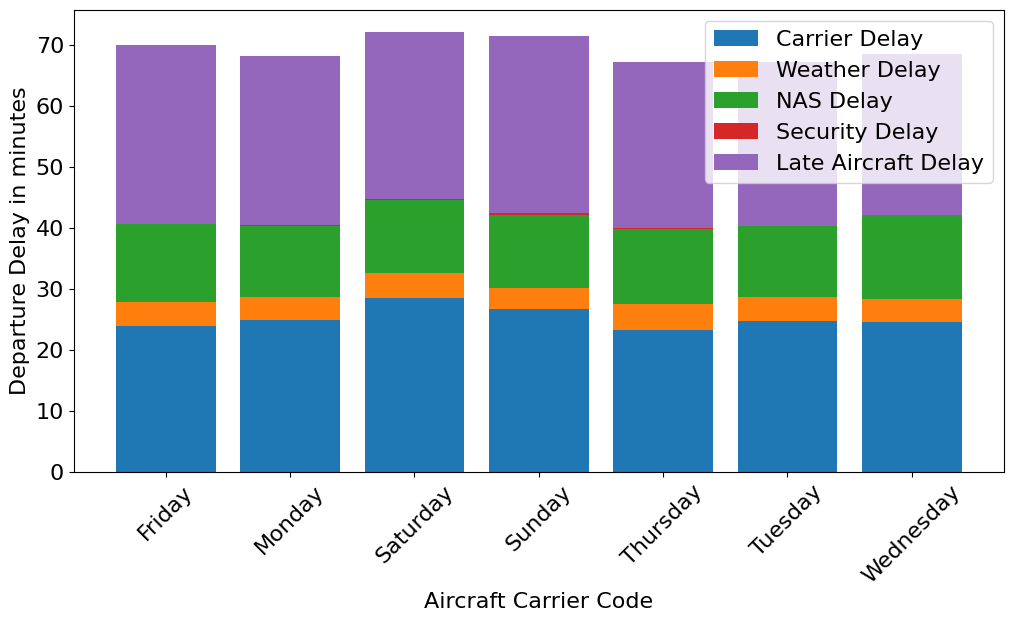

In [31]:
df['total_delay'] = (df['DELAY_DUE_CARRIER'] + df['DELAY_DUE_WEATHER']
             + df['DELAY_DUE_NAS'] + df['DELAY_DUE_SECURITY'] + df['DELAY_DUE_LATE_AIRCRAFT'])

df_delayed = df[~np.isnan(df['total_delay'])]
df['total_delay'].fillna(0, inplace=True)
df_delayed.head()

carrier_group = df_delayed['DELAY_DUE_CARRIER'].groupby(df_delayed['dia_semana_nombre']).mean()
weather_group = df_delayed['DELAY_DUE_WEATHER'].groupby(df_delayed['dia_semana_nombre']).mean()
nas_group = df_delayed['DELAY_DUE_NAS'].groupby(df_delayed['dia_semana_nombre']).mean()
security_group = df_delayed['DELAY_DUE_SECURITY'].groupby(df_delayed['dia_semana_nombre']).mean()
late_group = df_delayed['DELAY_DUE_LATE_AIRCRAFT'].groupby(df_delayed['dia_semana_nombre']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()

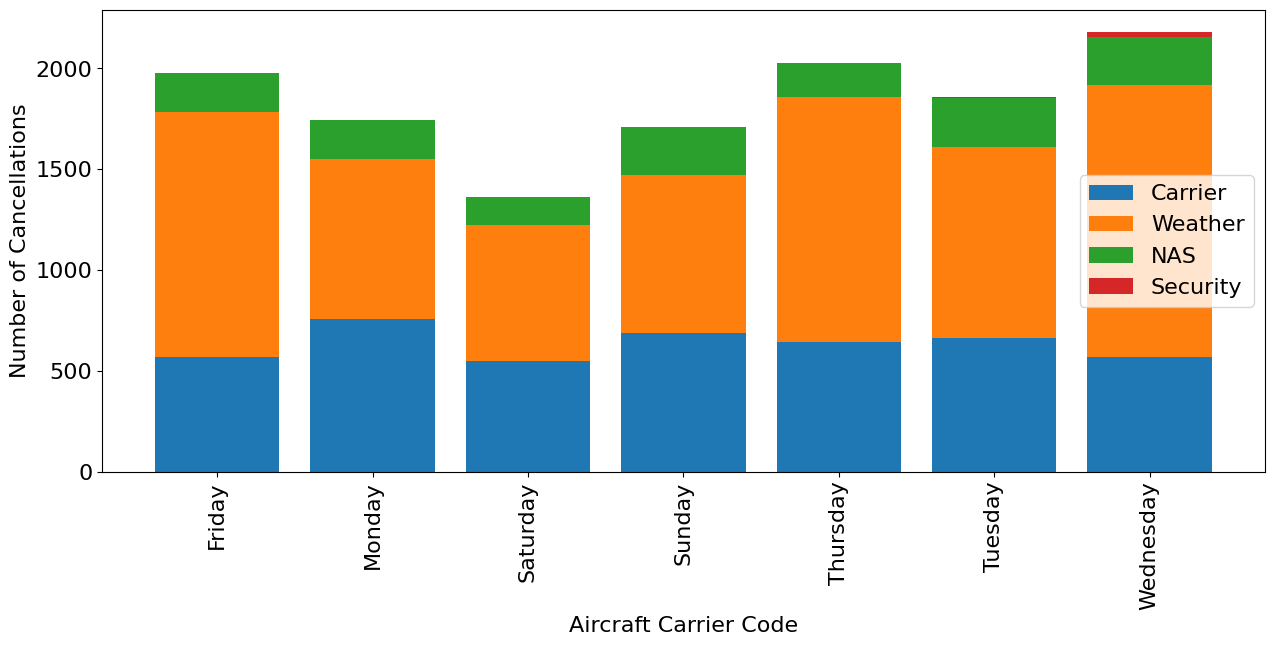

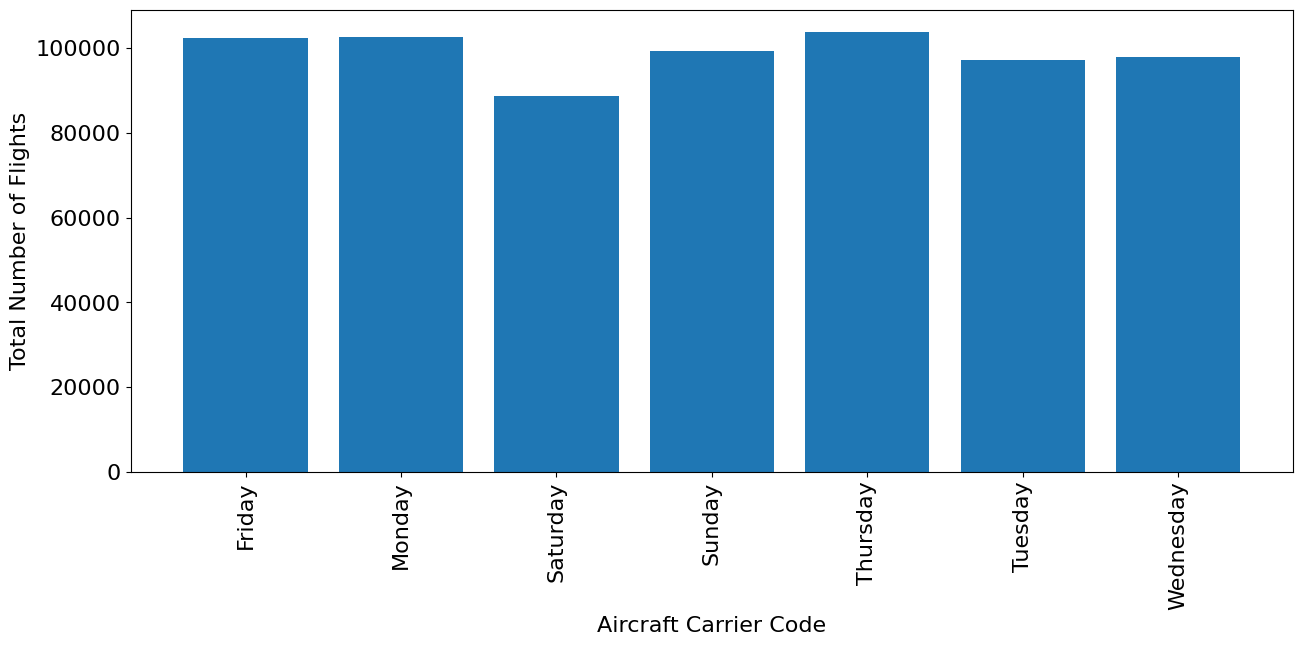

In [32]:
cancelled_group = cancelled.groupby(['dia_semana_nombre','CANCELLATION_CODE']).size().reindex(fill_value=0.0).unstack()
cg = cancelled_group.fillna(0)

b_bottom = cg.loc[:,'A'].values
c_bottom = b_bottom + cg.loc[:,'B'].values
d_bottom = c_bottom + cg.loc[:,'C'].values

x = cg.loc[:,'A'].index.values

fig, ax = plt.subplots(figsize = (15,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 90)
ax.bar(np.arange(len(x)),cg.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cg.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cg.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
ax.bar(np.arange(len(x)),cg.loc[:,'D'].values, align='center', bottom=d_bottom, label='Security')


ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Number of Cancellations')

plt.legend()
plt.show()

total_flights_per_carrier = df['dia_semana_nombre'].groupby(df['dia_semana_nombre']).count()

fig, ax1 = plt.subplots(figsize = (15,6))

x = total_flights_per_carrier.index.values

ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x, rotation = 90)
ax1.bar(np.arange(len(x)),total_flights_per_carrier.values, align='center')

ax1.set_xlabel('Aircraft Carrier Code')
ax1.set_ylabel('Total Number of Flights')

plt.show()

In [33]:
df_delayed1 = df_delayed[df_delayed['nombre_mes'] == 'December']
df_delayed1


,AIRLINE,DOT_CODE,FL_NUMBER,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,dia_semana,dia_semana_nombre,nombre_mes,YEAR,MONTH,DAY,total_delay
381,Horizon Air,19687,2405,"Anchorage, AK","Fairbanks, AK",600,620.0,20.0,15.0,635.0,...,0.0,0.0,0.0,Friday,Friday,December,2022,12,23,19.0
389,JetBlue Airways,20409,215,"Boston, MA","Dallas/Fort Worth, TX",1035,1101.0,26.0,18.0,1119.0,...,0.0,0.0,4.0,Monday,Monday,December,2022,12,19,26.0
401,United Air Lines Inc.,19977,2106,"Houston, TX","Newark, NJ",1940,2015.0,35.0,49.0,2104.0,...,28.0,0.0,13.0,Thursday,Thursday,December,2022,12,29,63.0
505,Frontier Airlines Inc.,20436,1163,"Philadelphia, PA","Orlando, FL",1108,1108.0,0.0,33.0,1141.0,...,17.0,0.0,0.0,Friday,Friday,December,2022,12,23,17.0
522,Southwest Airlines Co.,19393,564,"Orlando, FL","Baltimore, MD",910,950.0,40.0,11.0,1001.0,...,0.0,0.0,7.0,Tuesday,Tuesday,December,2022,12,20,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998919,Allegiant Air,20368,1199,"Ashland, WV","Sanford, FL",2131,2224.0,53.0,5.0,2229.0,...,0.0,0.0,30.0,Monday,Monday,December,2022,12,5,46.0
2999384,Spirit Air Lines,20416,740,"Fort Lauderdale, FL","Atlanta, GA",655,705.0,10.0,13.0,718.0,...,27.0,0.0,0.0,Tuesday,Tuesday,December,2022,12,27,27.0
2999481,American Airlines Inc.,19805,2820,"Charlotte, NC","Memphis, TN",1109,1127.0,18.0,24.0,1151.0,...,11.0,0.0,13.0,Monday,Monday,December,2022,12,26,29.0
2999720,American Airlines Inc.,19805,2471,"Dallas/Fort Worth, TX","Ontario, CA",1715,1928.0,133.0,16.0,1944.0,...,0.0,0.0,13.0,Friday,Friday,December,2022,12,23,117.0


C:\Users\Pilar\AppData\Local\Temp\ipykernel_9004\4086849799.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_delay'].fillna(0, inplace=True)


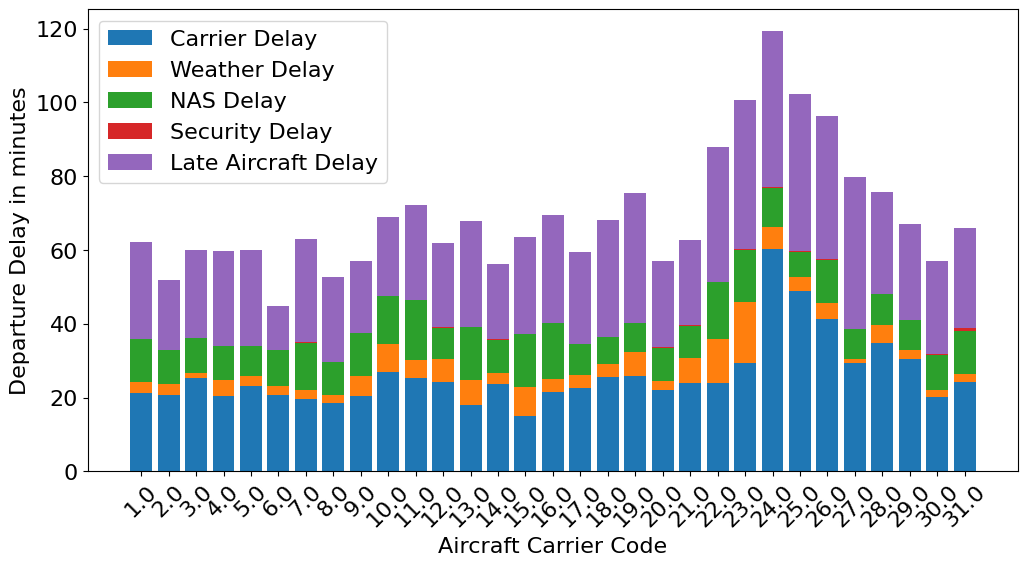

In [34]:
df['total_delay'] = (df['DELAY_DUE_CARRIER'] + df['DELAY_DUE_WEATHER']
             + df['DELAY_DUE_NAS'] + df['DELAY_DUE_SECURITY'] + df['DELAY_DUE_LATE_AIRCRAFT'])

df_delayed = df[~np.isnan(df['total_delay'])]
df['total_delay'].fillna(0, inplace=True)
df_delayed.head()

carrier_group = df_delayed['DELAY_DUE_CARRIER'].groupby(df_delayed1['DAY']).mean()
weather_group = df_delayed['DELAY_DUE_WEATHER'].groupby(df_delayed1['DAY']).mean()
nas_group = df_delayed['DELAY_DUE_NAS'].groupby(df_delayed1['DAY']).mean()
security_group = df_delayed['DELAY_DUE_SECURITY'].groupby(df_delayed1['DAY']).mean()
late_group = df_delayed['DELAY_DUE_LATE_AIRCRAFT'].groupby(df_delayed1['DAY']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()

In [35]:
cancelled_group1 = cancelled[cancelled['nombre_mes'] == 'December']
cancelled_group1

,AIRLINE,DOT_CODE,FL_NUMBER,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,dia_semana,dia_semana_nombre,nombre_mes,YEAR,MONTH,DAY
1152,Spirit Air Lines,20416,1150,"Fort Myers, FL","Detroit, MI",1620,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Sunday,Sunday,December,2022,12,25
3266,Southwest Airlines Co.,19393,720,"Orlando, FL","Austin, TX",1010,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Saturday,Saturday,December,2022,12,24
4094,PSA Airlines Inc.,20397,5062,"Akron, OH","Washington, DC",605,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Saturday,Saturday,December,2022,12,24
6271,Horizon Air,19687,2504,"Seattle, WA","Medford, OR",2240,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Friday,Friday,December,2022,12,23
7798,Southwest Airlines Co.,19393,1888,"Des Moines, IA","St. Louis, MO",550,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Tuesday,Tuesday,December,2022,12,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996512,Allegiant Air,20368,334,"Nashville, TN","Cedar Rapids/Iowa City, IA",1223,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Friday,Friday,December,2022,12,23
2997180,Delta Air Lines Inc.,19790,928,"Detroit, MI","Fort Lauderdale, FL",1425,1637.0,132.0,NaN,NaN,...,NaN,NaN,NaN,NaN,Friday,Friday,December,2022,12,23
2997684,Southwest Airlines Co.,19393,2100,"Raleigh/Durham, NC","Tampa, FL",1440,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Saturday,Saturday,December,2022,12,24
2997700,Mesa Airlines Inc.,20378,5888,"Fargo, ND","Phoenix, AZ",1459,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Thursday,Thursday,December,2022,12,15


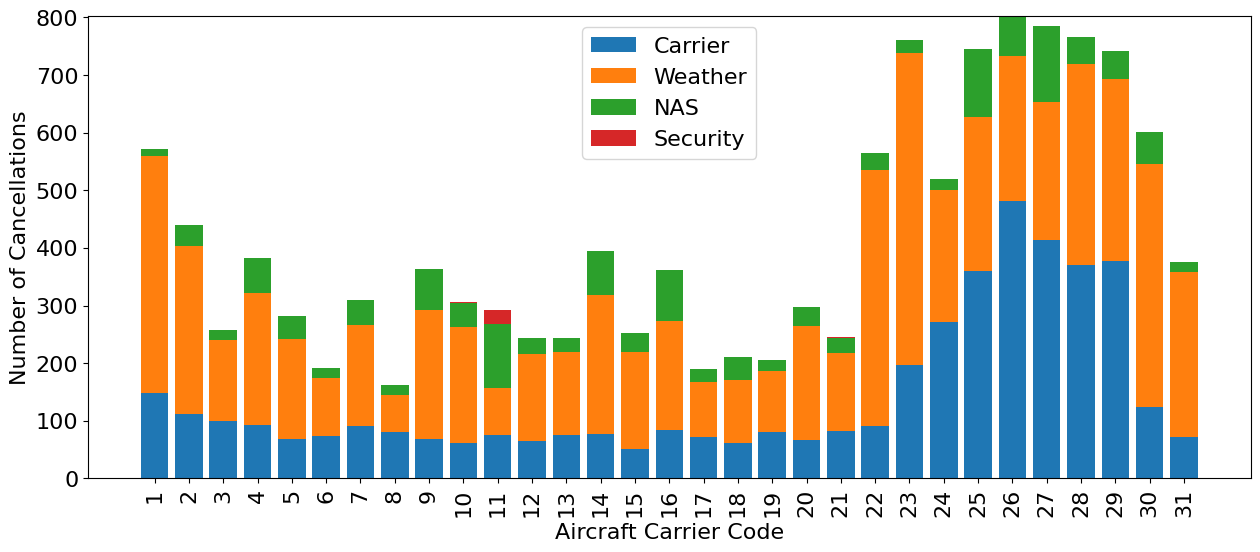

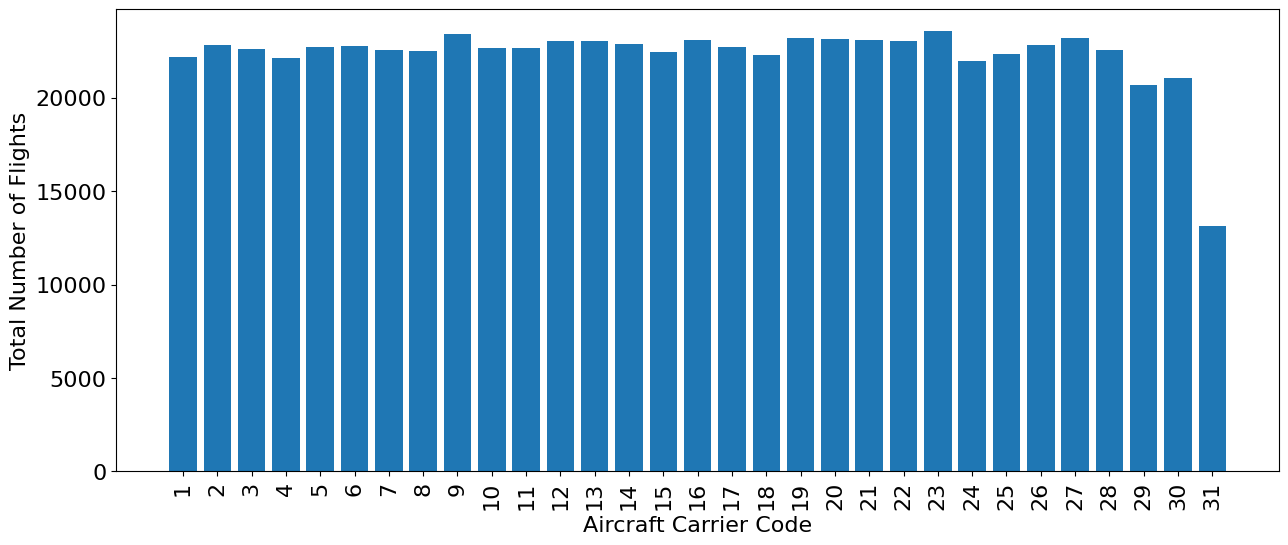

In [36]:
cancelled_group1 = cancelled.groupby(['DAY','CANCELLATION_CODE']).size().reindex(fill_value=0.0).unstack()
cg = cancelled_group1.fillna(0)

b_bottom = cg.loc[:,'A'].values
c_bottom = b_bottom + cg.loc[:,'B'].values
d_bottom = c_bottom + cg.loc[:,'C'].values

x = cg.loc[:,'A'].index.values

fig, ax = plt.subplots(figsize = (15,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 90)
ax.bar(np.arange(len(x)),cg.loc[:,'A'].values, align='center', label='Carrier')
ax.bar(np.arange(len(x)),cg.loc[:,'B'].values, align='center', bottom=b_bottom, label='Weather')
ax.bar(np.arange(len(x)),cg.loc[:,'C'].values, align='center', bottom=c_bottom, label='NAS')
ax.bar(np.arange(len(x)),cg.loc[:,'D'].values, align='center', bottom=d_bottom, label='Security')


ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Number of Cancellations')

plt.legend()
plt.show()

total_flights_per_carrier = df['DAY'].groupby(df['DAY']).count()

fig, ax1 = plt.subplots(figsize = (15,6))

x = total_flights_per_carrier.index.values

ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x, rotation = 90)
ax1.bar(np.arange(len(x)),total_flights_per_carrier.values, align='center')

ax1.set_xlabel('Aircraft Carrier Code')
ax1.set_ylabel('Total Number of Flights')

plt.show()